In [3]:
%pylab inline
import os, sys
import json
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [30]:
heuristics = {'random': {'color':'b', 'marker':'o'},
              'connection': {'color':'r', 'marker':'s'}
             }

resultDict = dict()
for h in heuristics:
    res = list()
    with open('experiments/experiment_{}-select.jsons'.format(h), 'r') as fl:
        for line in fl:
            res.append(json.loads(line))
    resultDict[h] = res

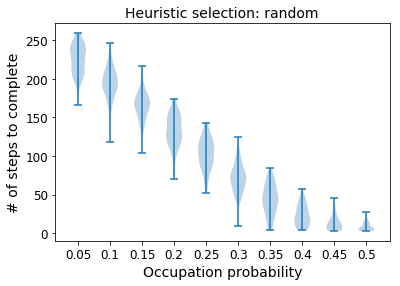

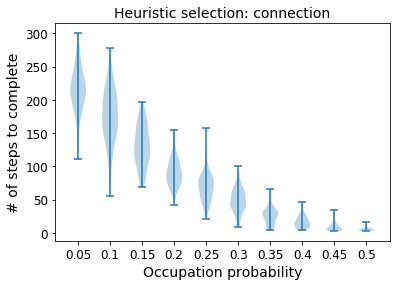

In [37]:
def visualize_step_distributions(df, title=None):
    pvals, violinData = list(), list()
    for p in sorted(df['p'].unique()):
        pvals.append(p)
        violinData.append(list(df[df['p'] == p]['n_steps']))

    fig = plt.figure(figsize=(6,4))
    plt.violinplot(violinData)
    plt.xticks(range(1,len(pvals)+1), pvals)
    plt.tick_params(labelsize=12)
    plt.xlabel('Occupation probability', fontsize=14)
    plt.ylabel('# of steps to complete', fontsize=14)
    
    if title != None:
        plt.title(title, fontsize=14)

        
for h in resultDict:
    visualize_step_distributions(pd.DataFrame(resultDict[h]), 'Heuristic selection: {}'.format(h))

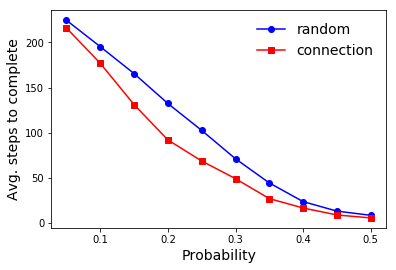

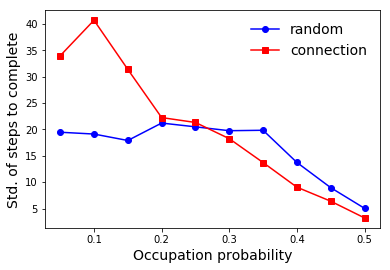

In [38]:
fig = plt.figure(figsize=(6,4))
for h in resultDict:
    df = pd.DataFrame(resultDict[h])
    pvals = sorted(df['p'].unique())
    meanV = [df[df['p'] == p]['n_steps'].mean() for p in pvals]
    plt.plot(pvals, meanV, c=heuristics[h]['color'], marker=heuristics[h]['marker'], label=h)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Avg. steps to complete', fontsize=14)
plt.legend(frameon=False, fontsize=14)


fig = plt.figure(figsize=(6,4))
for h in resultDict:
    df = pd.DataFrame(resultDict[h])
    pvals = sorted(df['p'].unique())
    meanV = [df[df['p'] == p]['n_steps'].std() for p in pvals]
    plt.plot(pvals, meanV, c=heuristics[h]['color'], marker=heuristics[h]['marker'], label=h)
plt.xlabel('Occupation probability', fontsize=14)
plt.ylabel('Std. of steps to complete', fontsize=14)
plt.legend(frameon=False, fontsize=14)
